In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
# Read heart attack data from csv
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/heart_attack_prediction_dataset.csv")

In [3]:
# Use .info() method to get information of the variables in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
# Gives a quick way to understand the statistics of the dataset!
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


## Interpretting the dataset
We are looking at a dataset consisting of covariates (factors) of individuals with heart attacks. We want to understand how the different factors affect the `Heart Attack Risk` variable.

Begin by understanding the distribution of heart attack risk, what do we mean by risk?

From the information printed above we see that `Heart Attack Risk` is an integer, is there a certain distriubtion of these integers? Let's plot a histogram to get an understanding of this variable.

<Axes: ylabel='Frequency'>

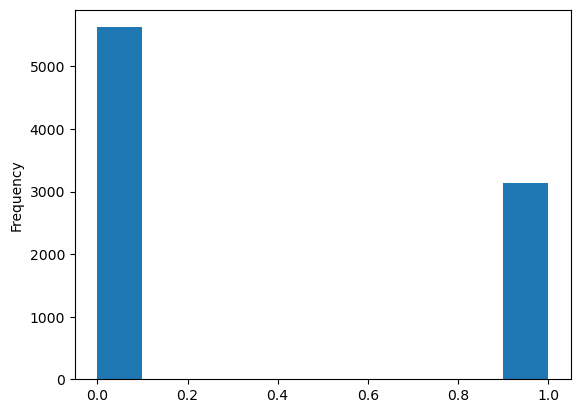

In [6]:
df['Heart Attack Risk'].plot.hist()

Perfect! We see that we only have $0,1$. From this I wager that this is a count of the people in the set who has had a heart attack, where $0$ means no heart attack and $1$ means the person has had a heart attack. 

Next, lets look at how the variables are distributed. Some variables that I find interesting are the following

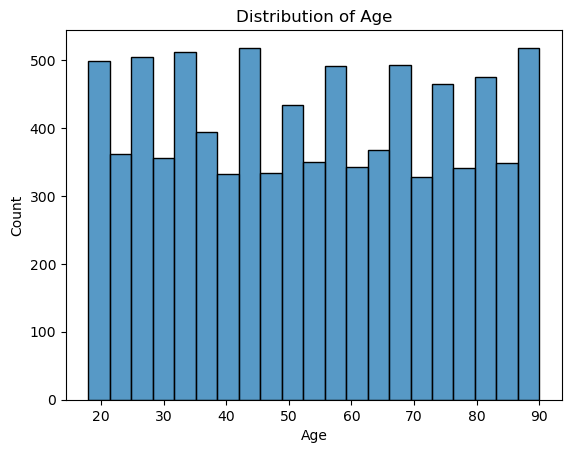

In [10]:
sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

Age seems to be very balanced.


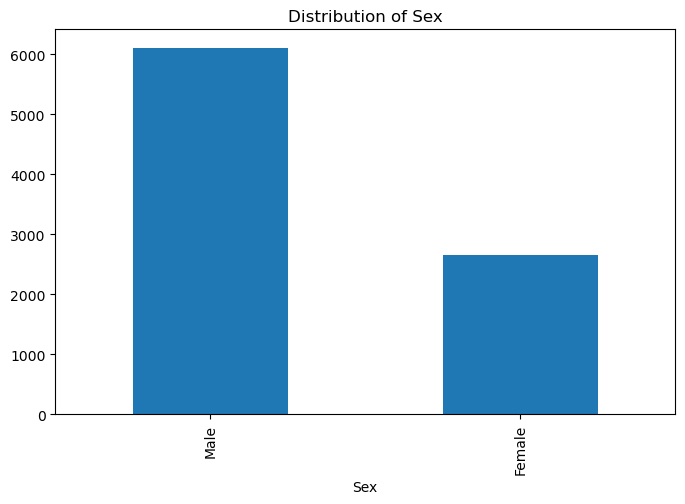

In [11]:
# Categorical Variable - Sex
plt.figure(figsize=(8, 5))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Sex')
plt.show()

We can see that there are about 3x more males entries in this study than females.

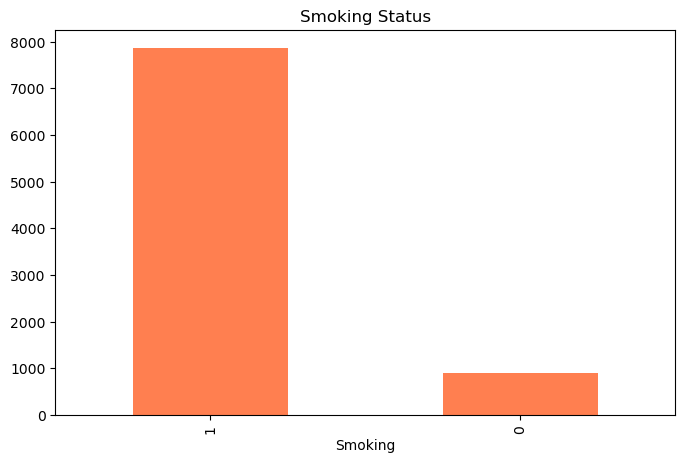

In [12]:
# Binary Variable - Smoking
plt.figure(figsize=(8, 5))
df['Smoking'].value_counts().plot(kind='bar', color='coral')
plt.title('Smoking Status')
plt.show()

Most people in this dataset are smokers.

Next, lets look at how some of these variables corrolate. For instance, BMI and trygliceride.

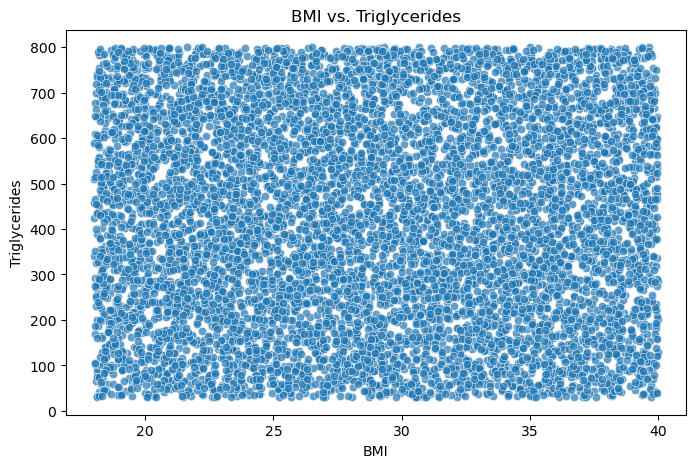

In [13]:
# Numerical vs. Numerical - BMI vs. Triglycerides
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='Triglycerides', data=df, alpha=0.7)
plt.title('BMI vs. Triglycerides')
plt.show()

There does not seem to be any correlation structure at all here. It seems to be random

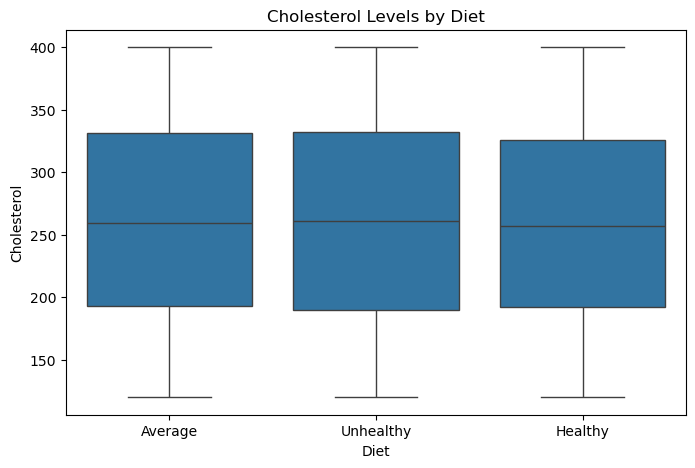

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diet', y='Cholesterol', data=df)
plt.title('Cholesterol Levels by Diet')
plt.show()

This is a bit strange, it seems that your diet has not effect on your cholestoral?

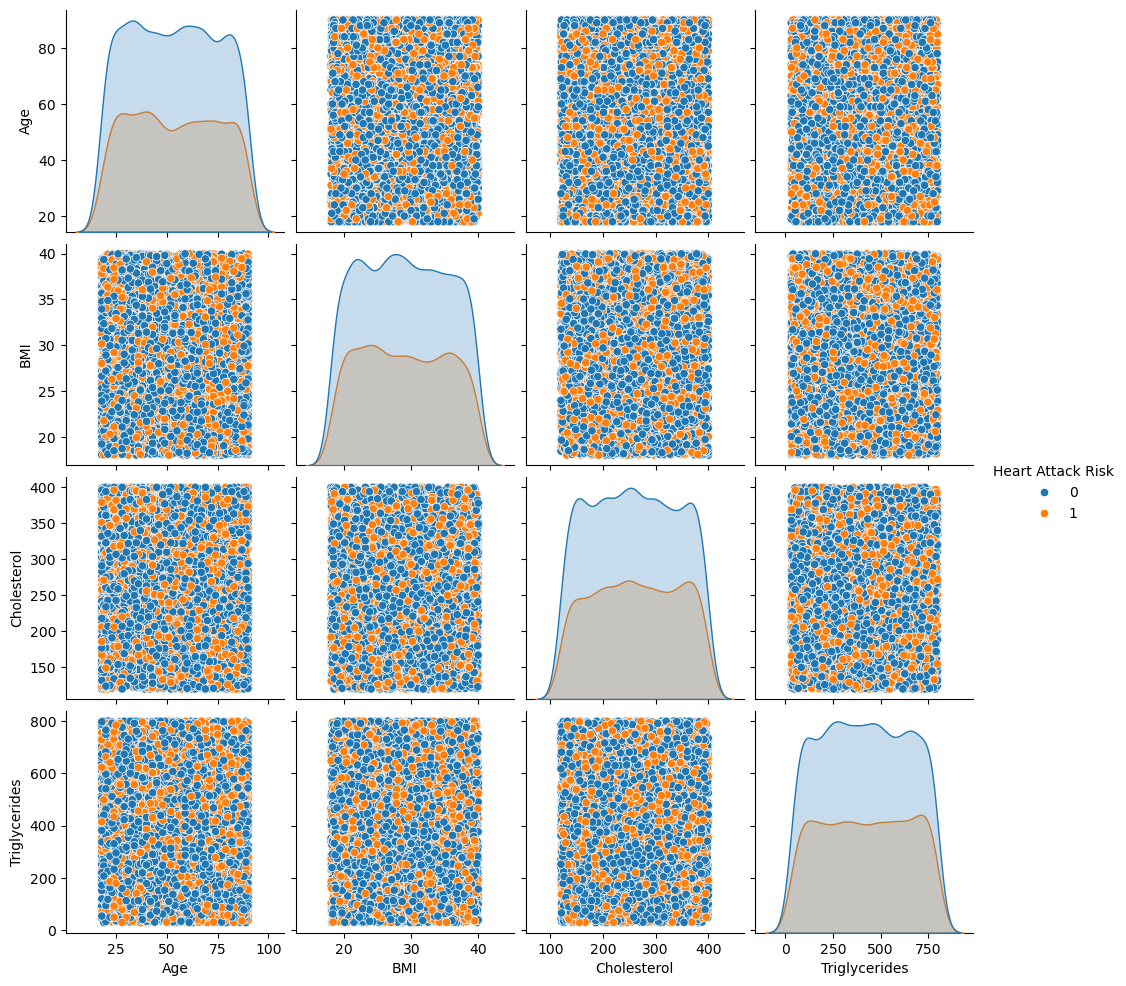

In [15]:
selected_features = ['Age', 'BMI', 'Cholesterol', 'Triglycerides', 'Heart Attack Risk']
sns.pairplot(df[selected_features], hue='Heart Attack Risk')
plt.show()

We can conclude that this dataset is false!

# Data Processing

## Restructuring data

In [16]:
import json

In [17]:
data_dict = json.loads('{"GOOGL": [{"Close": 165.13999938964844, "Dividends": 0.0, "High": 165.77000427246094, "Low": 162.97999572753906, "Open": 162.97999572753906, "Stock Splits": 0.0, "Volume": 16568100.0}, {"Close": 162.77999877929688, "Dividends": 0.0, "High": 165.82000732421875, "Low": 161.92999267578125, "Open": 164.75999450683594, "Stock Splits": 0.0, "Volume": 18280500.0}, {"Close": 162.72000122070312, "Dividends": 0.0, "High": 163.3300018310547, "Low": 161.00999450683594, "Open": 162.8300018310547, "Stock Splits": 0.0, "Volume": 22412500.0}, {"Close": 165.27000427246094, "Dividends": 0.0, "High": 165.58999633789062, "Low": 163.4199981689453, "Open": 163.6699981689453, "Stock Splits": 0.0, "Volume": 19828900.0}, {"Close": 166.72000122070312, "Dividends": 0.0, "High": 168.75, "Low": 163.9499969482422, "Open": 168.75, "Stock Splits": 0.0, "Volume": 32138600.0}, {"Close": 169.67999267578125, "Dividends": 0.0, "High": 170.3800048828125, "Low": 167.08999633789062, "Open": 167.72999572753906, "Stock Splits": 0.0, "Volume": 42169000.0}, {"Close": 174.4600067138672, "Dividends": 0.0, "High": 182.02000427246094, "Low": 174.05999755859375, "Open": 180.67999267578125, "Stock Splits": 0.0, "Volume": 68890800.0}, {"Close": 171.11000061035156, "Dividends": 0.0, "High": 176.82000732421875, "Low": 171.0, "Open": 173.1300048828125, "Stock Splits": 0.0, "Volume": 44769000.0}, {"Close": 171.2899932861328, "Dividends": 0.0, "High": 172.32000732421875, "Low": 168.8800048828125, "Open": 170.07000732421875, "Stock Splits": 0.0, "Volume": 31796500.0}, {"Close": 169.24000549316406, "Dividends": 0.0, "High": 170.72999572753906, "Low": 168.00999450683594, "Open": 169.92999267578125, "Stock Splits": 0.0, "Volume": 21492700.0}, {"Close": 169.74000549316406, "Dividends": 0.0, "High": 170.52999877929688, "Low": 168.83999633789062, "Open": 169.42999267578125, "Stock Splits": 0.0, "Volume": 18242100.0}, {"Close": 176.50999450683594, "Dividends": 0.0, "High": 176.94000244140625, "Low": 173.5, "Open": 173.8000030517578, "Stock Splits": 0.0, "Volume": 33695500.0}, {"Close": 180.75, "Dividends": 0.0, "High": 181.0800018310547, "Low": 177.19000244140625, "Open": 177.41000366210938, "Stock Splits": 0.0, "Volume": 25352900.0}, {"Close": 178.35000610351562, "Dividends": 0.0, "High": 180.89999389648438, "Low": 178.0800018310547, "Open": 180.64999389648438, "Stock Splits": 0.0, "Volume": 22006200.0}, {"Close": 180.35000610351562, "Dividends": 0.0, "High": 180.5500030517578, "Low": 178.47000122070312, "Open": 178.5800018310547, "Stock Splits": 0.0, "Volume": 17450400.0}, {"Close": 181.6199951171875, "Dividends": 0.0, "High": 182.49000549316406, "Low": 179.38999938964844, "Open": 179.82000732421875, "Stock Splits": 0.0, "Volume": 25134900.0}, {"Close": 178.8800048828125, "Dividends": 0.0, "High": 180.9600067138672, "Low": 178.5399932861328, "Open": 180.4600067138672, "Stock Splits": 0.0, "Volume": 23184000.0}, {"Close": 175.5800018310547, "Dividends": 0.0, "High": 178.82000732421875, "Low": 174.32000732421875, "Open": 178.27999877929688, "Stock Splits": 0.0, "Volume": 31007500.0}, {"Close": 172.49000549316406, "Dividends": 0.0, "High": 174.13999938964844, "Low": 171.22000122070312, "Open": 173.72999572753906, "Stock Splits": 0.0, "Volume": 32504600.0}, {"Close": 175.3000030517578, "Dividends": 0.0, "High": 175.44000244140625, "Low": 172.89999389648438, "Open": 173.4199981689453, "Stock Splits": 0.0, "Volume": 20135300.0}], "AAPL": [{"Close": 235.60079956054688, "Dividends": 0.0, "High": 235.96040454410334, "Low": 232.3443876620224, "Open": 233.6329632952546, "Stock Splits": 0.0, "Volume": 38846600}, {"Close": 230.5063934326172, "Dividends": 0.0, "High": 234.88158476901867, "Low": 227.50969037853835, "Open": 233.822752128634, "Stock Splits": 0.0, "Volume": 52287000}, {"Close": 230.31661987304688, "Dividends": 0.0, "High": 230.56634513279107, "Low": 228.15898997077215, "Open": 229.7272566761152, "Stock Splits": 0.0, "Volume": 31109500}, {"Close": 231.1556854248047, "Dividends": 0.0, "High": 232.96369380669327, "Low": 229.3177112321018, "Open": 229.4875225740561, "Stock Splits": 0.0, "Volume": 38802300}, {"Close": 233.14349365234375, "Dividends": 0.0, "High": 234.472033847566, "Low": 232.29443692443334, "Open": 233.06359498314518, "Stock Splits": 0.0, "Volume": 36087100}, {"Close": 233.41319274902344, "Dividends": 0.0, "High": 234.07247106119948, "Low": 232.06468555632105, "Open": 232.84382710997653, "Stock Splits": 0.0, "Volume": 35417200}, {"Close": 229.8471221923828, "Dividends": 0.0, "High": 233.21341362628857, "Low": 229.29772360355057, "Open": 232.35435817157438, "Stock Splits": 0.0, "Volume": 47070900}, {"Close": 225.66172790527344, "Dividends": 0.0, "High": 229.57741798472995, "Low": 225.1223128313268, "Open": 229.08795100904055, "Stock Splits": 0.0, "Volume": 64370100}, {"Close": 222.66502380371094, "Dividends": 0.0, "High": 225.10234466312102, "Low": 220.02792579428782, "Open": 220.72715344034327, "Stock Splits": 0.0, "Volume": 65276700}, {"Close": 221.76600646972656, "Dividends": 0.0, "High": 222.54514803369162, "Low": 219.46854635353304, "Open": 220.74713841963055, "Stock Splits": 0.0, "Volume": 44944500}, {"Close": 223.2044219970703, "Dividends": 0.0, "High": 223.70387248945224, "Low": 220.896963160989, "Open": 221.5562414690178, "Stock Splits": 0.0, "Volume": 28111300}, {"Close": 222.47523498535156, "Dividends": 0.0, "High": 225.82155947797517, "Low": 220.94691765378838, "Open": 222.36535526416637, "Stock Splits": 0.0, "Volume": 54561100}, {"Close": 227.22999572753906, "Dividends": 0.0, "High": 227.629565273657, "Low": 224.32320539488208, "Open": 224.38313701629485, "Stock Splits": 0.0, "Volume": 42137700}, {"Close": 226.9600067138672, "Dividends": 0.25, "High": 228.66000366210938, "Low": 226.41000366210938, "Open": 227.1699981689453, "Stock Splits": 0.0, "Volume": 38328800}, {"Close": 224.22999572753906, "Dividends": 0.0, "High": 225.6999969482422, "Low": 221.5, "Open": 225.0, "Stock Splits": 0.0, "Volume": 42005600}, {"Close": 224.22999572753906, "Dividends": 0.0, "High": 225.58999633789062, "Low": 223.36000061035156, "Open": 224.5500030517578, "Stock Splits": 0.0, "Volume": 40398300}, {"Close": 225.1199951171875, "Dividends": 0.0, "High": 226.64999389648438, "Low": 222.75999450683594, "Open": 224.00999450683594, "Stock Splits": 0.0, "Volume": 48566200}, {"Close": 228.22000122070312, "Dividends": 0.0, "High": 228.8699951171875, "Low": 225.0, "Open": 225.02000427246094, "Stock Splits": 0.0, "Volume": 44923900}, {"Close": 225.0, "Dividends": 0.0, "High": 226.9199981689453, "Low": 224.27000427246094, "Open": 226.39999389648438, "Stock Splits": 0.0, "Volume": 47923700}, {"Close": 228.02000427246094, "Dividends": 0.0, "High": 229.74000549316406, "Low": 225.1699981689453, "Open": 225.25, "Stock Splits": 0.0, "Volume": 44633700}]}')

In [18]:
data_dict.keys()

dict_keys(['GOOGL', 'AAPL'])

The data is structure in the following way:
```
{
"GOOGL" : [{"Close", "Dividends", "High", "Low", "Open", "Stock Splits", "Volume},...],
"AAPL": [{...},...]
}
```

We need to rework it slightly to get it into a nice data structure.

In [23]:
# Do work here
data_points = []
for stock in data_dict.keys():
    for price_data in data_dict[stock]:
        point = {"stock_ticker": stock, **price_data}
        data_points.append(point)

In [24]:
df = pd.DataFrame.from_dict(data_points)
df.head()

,stock_ticker,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,GOOGL,165.139999,0.0,165.770004,162.979996,162.979996,0.0,16568100.0
1,GOOGL,162.779999,0.0,165.820007,161.929993,164.759995,0.0,18280500.0
2,GOOGL,162.720001,0.0,163.330002,161.009995,162.830002,0.0,22412500.0
3,GOOGL,165.270004,0.0,165.589996,163.419998,163.669998,0.0,19828900.0
4,GOOGL,166.720001,0.0,168.750000,163.949997,168.750000,0.0,32138600.0
